### Imports

In [1]:
from image import load
from pathlib import Path
import matplotlib.pyplot as plt

from skimage.morphology import closing, square, erosion
from skimage.measure import label, regionprops

from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

import matplotlib.patches as mpatches

import numpy as np

### Load the image

In [10]:
#cal_image = load("PRUEBA_LUIS.tif", for_calib = True)

file_path = Path("/home/luis/Dosepy/src/Dosepy") / "data" / "PRUEBA_LUIS.tif"
cal_image = load(file_path, for_calib = True)

pixels_to_remove_border = int(cal_image.dpmm * 3)
print(f"Pixels_to_remove_border: {pixels_to_remove_border}")

Pixels_to_remove_border: 8


### Films detection

1. Grayscale for film identification using threshold
2. erosion is used to remove film border.

In [11]:
grayscale = rgb2gray(cal_image.array)
thresh = threshold_otsu(grayscale)

binary = erosion(grayscale < thresh, square(pixels_to_remove_border))

label_image, num = label(binary, return_num = True)
print(f"Number of images detected: {num}")

# Films
films = regionprops(label_image, intensity_image = cal_image.array[:,:,1])

Number of images detected: 9


(33.32318659589968, 269.6463211572484)
(35.03684952241766, 271.85536823425025)
(35.64455288118866, 255.0985251384396)
(40.86380733172402, 285.92870375568407)
(42.53953684654745, 271.9190272722477)
(39.714138062340204, 277.2293967252353)
(43.283477291724715, 277.4672610755085)
(38.437753909510825, 280.5093772608381)
(32.740511455681556, 395.1081925480213)


[4442.718387230514,
 6386.174747474747,
 11853.75608974359,
 18575.824152060097,
 23971.522045855378,
 27466.00697916667,
 31816.30708915145,
 36897.664289958404,
 45078.71123292762]

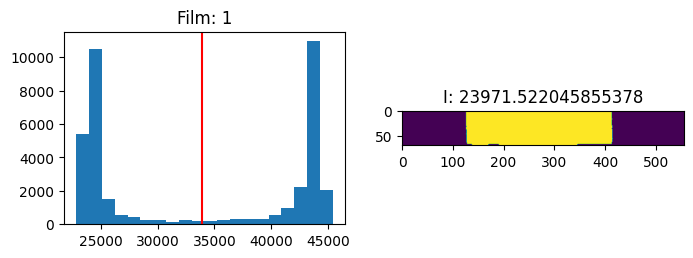

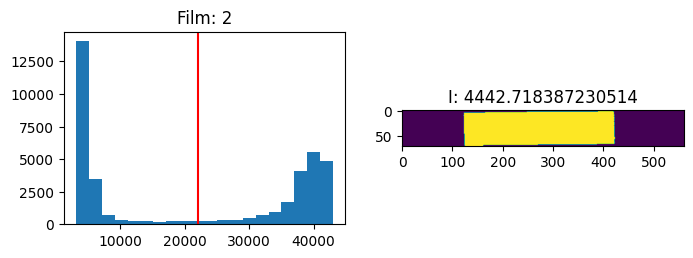

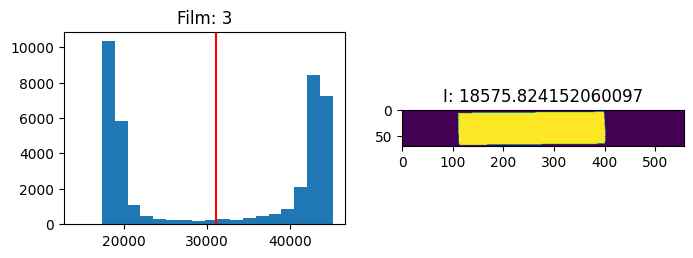

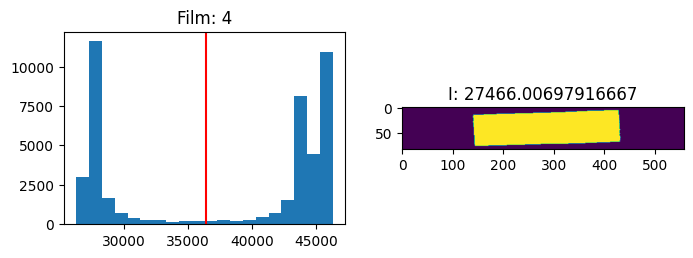

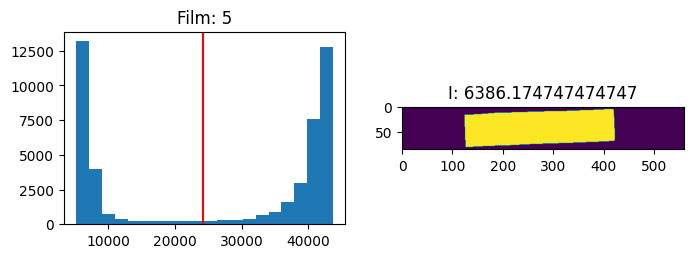

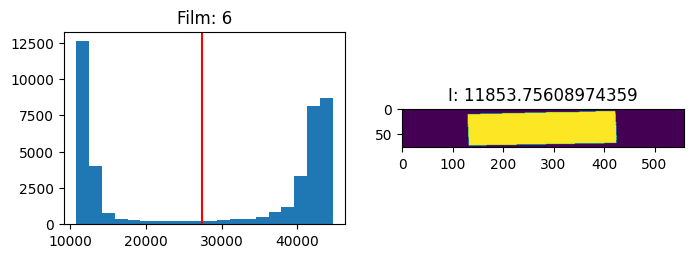

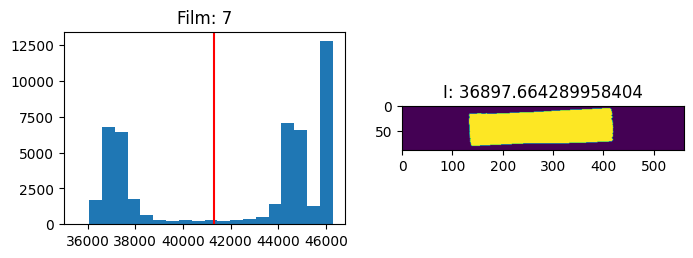

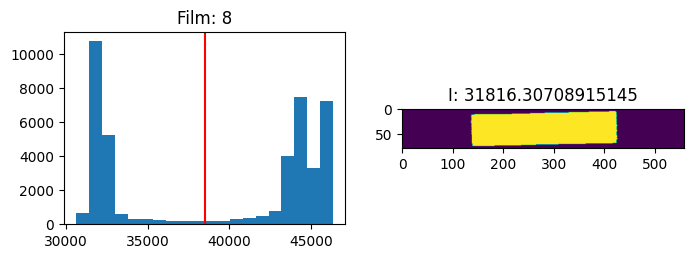

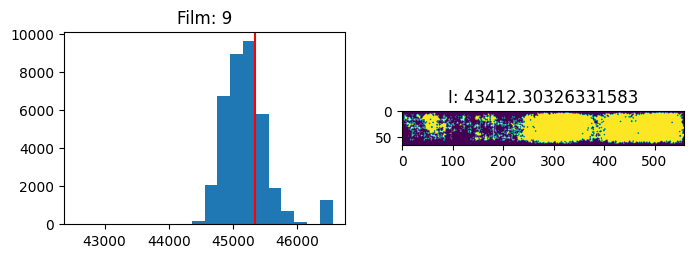

In [18]:
from skimage.filters import sobel
mean = []
i = 1
for region in films:
    
    region.image_intensity[region.image_intensity == 0] = np.max(region.image_intensity)
    th = threshold_otsu(region.image_intensity)

    # Used for field detection inside the film
    bin = erosion(region.image_intensity < th)

    fig, axes = plt.subplots(ncols=2, figsize=(8, 2.5))
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 2, 1)
    ax[1] = plt.subplot(1, 2, 2)

    ax[0].hist(region.image_intensity.ravel(), bins = 20)
    ax[1].imshow(bin)
    
    ax[0].axvline(th, color='r')
    ax[0].set_title(f"Film: {i}")

    lb = label(bin)
    reg = regionprops(lb, intensity_image = region.image_intensity)
    #print(reg[0].image_intensity.shape)
    print(reg[0].centroid)
    field = reg[0].image_intensity[10:-10,50:-50]
    #print(np.mean(field))
    ax[1].set_title(f"I: {np.mean(field)}")
    mean.append(np.mean(field))

    i += 1

mean[-1] = np.mean(films[-1].image_intensity[10:-10,50:-50])
sorted(mean)